Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

ModuleNotFoundError: No module named 'matplotlib'

Data Collection

In [14]:
car_dataset = pd.read_csv('/content/Cardetails (1).csv')

In [15]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
#checking the number of rows and columns
car_dataset.shape

(8128, 13)

In [17]:
#getting information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [18]:
#checking the number of missing values
car_dataset.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [40]:
#checking category of data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

1    4402
0    3631
2      57
3      38
Name: fuel, dtype: int64
0    6766
1    1126
2     236
Name: seller_type, dtype: int64
0    7078
1    1050
Name: transmission, dtype: int64
0    5289
1    2105
2     555
3     174
4       5
Name: owner, dtype: int64


Encoding the Data

In [39]:
#encoding "fuel" column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}}, inplace=True)
#encoding "seller_type" column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)
#encoding "transmission" column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)
#encoding "owner" column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}}, inplace=True)

In [56]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,0,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,0,1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,0,2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,0,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,0,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Splitting Data and Target

In [54]:
X = car_dataset.drop(['name','selling_price','mileage','engine','max_power','torque','seats'],axis=1)
Y = car_dataset['selling_price']

In [55]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2014     145500     1            0             0      0
1     2014     120000     1            0             0      1
2     2006     140000     0            0             0      2
3     2010     127000     1            0             0      0
4     2007     120000     0            0             0      0
...    ...        ...   ...          ...           ...    ...
8123  2013     110000     0            0             0      0
8124  2007     119000     1            0             0      3
8125  2009     120000     1            0             0      0
8126  2013      25000     1            0             0      0
8127  2013      25000     1            0             0      0

[8128 rows x 6 columns]


In [51]:
print(Y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64


Splitting Training and Test Data

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

Training the Mode

1. Linear Regression

In [72]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [60]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [61]:
#prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [63]:
#R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error :", error_score)

R squared error : 0.4671579460346076


Visualize the Actual Prices and Predicted Prices

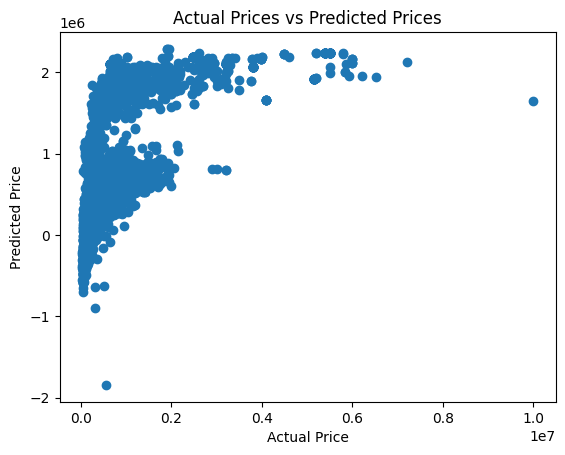

In [66]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [68]:
#prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [69]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.4757617034068198


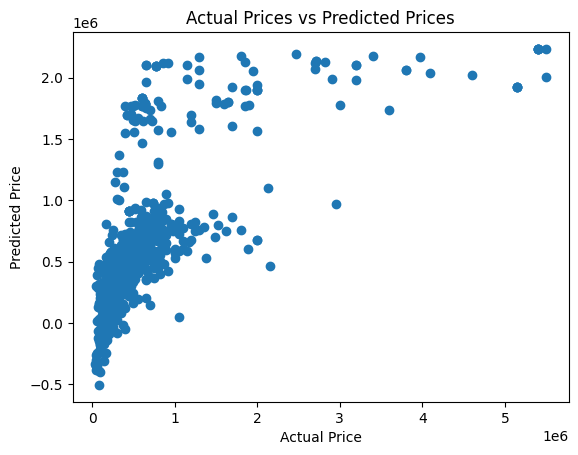

In [70]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2.Lasso Regression

In [76]:
#loading the lasso regression model
las_reg_model = Lasso()

In [77]:
las_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [78]:
#prediction on Training data
training_data_prediction = las_reg_model.predict(X_train)

In [79]:
#R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error :", error_score)

R squared error : 0.46715794600603644


Visualize the Actual Prices and Predicted Prices

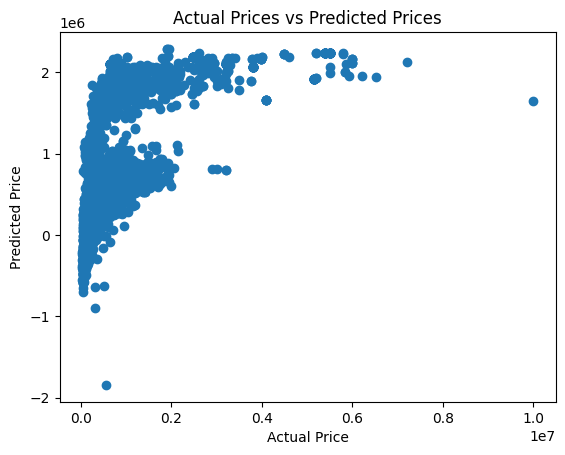

In [80]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [81]:
#prediction on Testing data
test_data_prediction = las_reg_model.predict(X_test)

In [82]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.4757617771280338


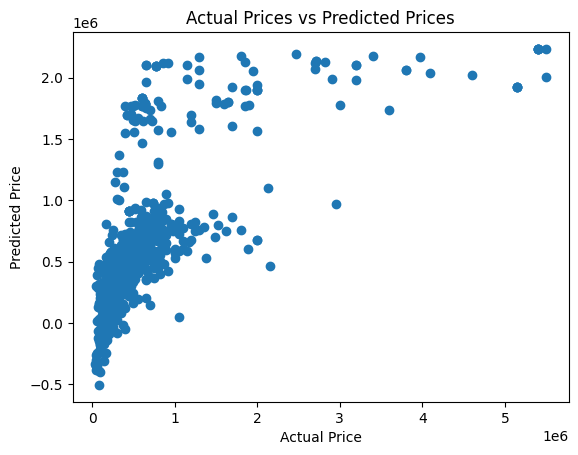

In [83]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()